# Learning seaborn

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tps = sns.load_dataset('tips')

In [3]:
(tps
 .head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Visualizing relationships: relplot

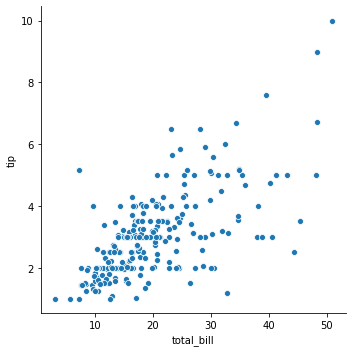

In [24]:
# scatterplot first
sns.relplot(x='total_bill', y='tip', data=tps)

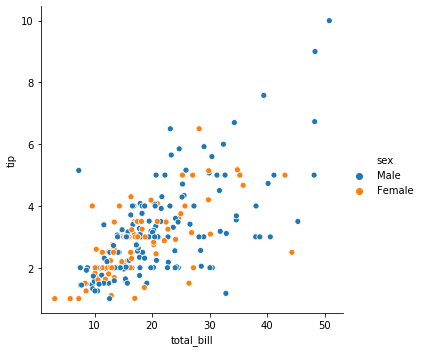

In [14]:
sns.relplot(x='total_bill', y='tip', hue='sex', data=tps)

### Assignment 1:
1) Visualize relationship between total bill and party size. What is special about variable resembling party size?

2) Plot total bill vs tip colored by party size. What is different now?  How is it different from sex variable?

3) Try changing the style of points with new aestetic `style`. Style the points by smoker.

4) Last aestetic we will learn today is called `size`. Size the points by company size. Keep the coloring and styling mapped to other variables.

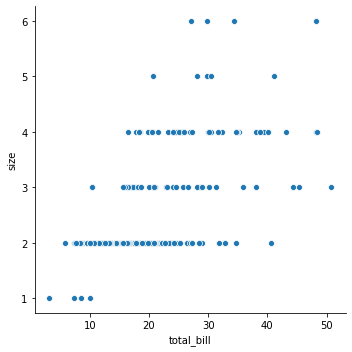

In [21]:
sns.relplot(x='total_bill', y='size', data=tps)

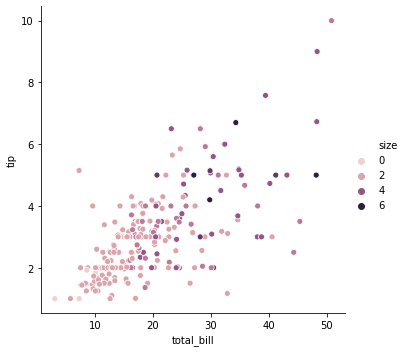

In [22]:
sns.relplot(x='total_bill', y='tip', hue='size', data=tps)

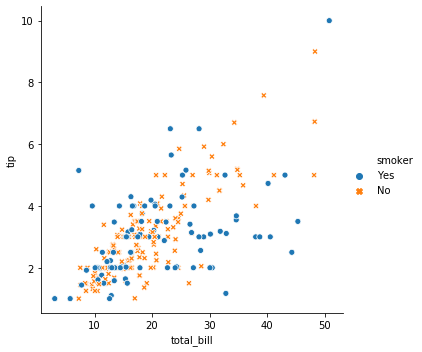

In [28]:
sns.relplot(x='total_bill', y='tip', 
            style='smoker', hue='smoker', data=tps)

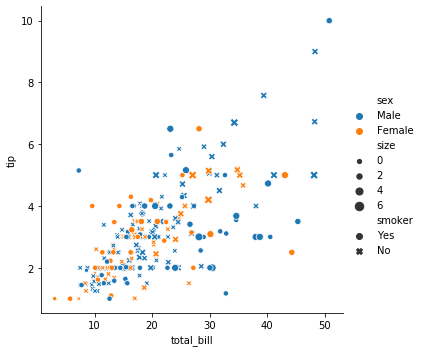

In [29]:
sns.relplot(x='total_bill', y='tip', 
            style='smoker', hue='sex', size='size', data=tps)

## Visualizing categorical variables: catplot

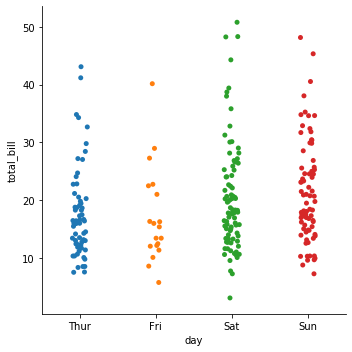

In [30]:
sns.catplot(x='day', y='total_bill', data=tps)

Note that catplot automatically picks hue aestetic to differentiate categories. This kind of plot is called `stripplot` and it is quite similar to out experiment with party size mapped to one of the axis, except there we had all points perfectly aligned along several straight lines, while here we have the same points "jittered". You can control jittering with an argument within `catplot` like such:

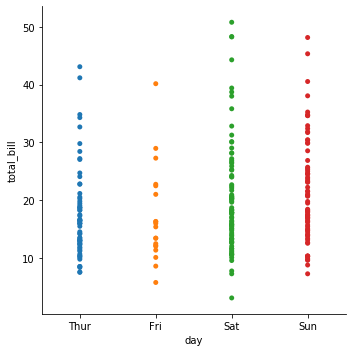

In [31]:
sns.catplot(x='day', y='total_bill', jitter=False, data=tps)

This is of course not desirable because of overplotting. There are other "kinds" of categorical plots which can be controlled with `kind` argument. Let's try 'swarm' plot.

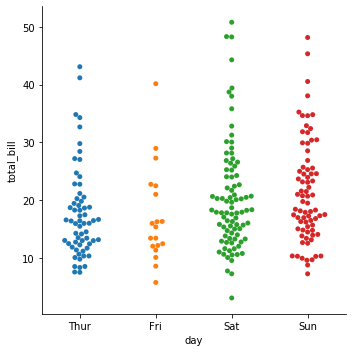

In [32]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=tps)

Perhaps better visualization for understanding distribution of data is violin plot (density on both sides) or box plot.

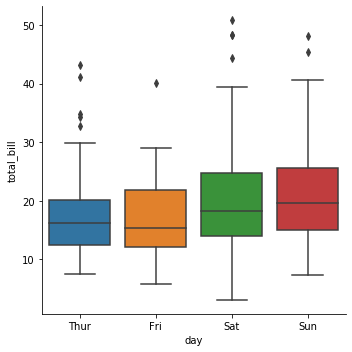

In [53]:
sns.catplot(x='day', y='total_bill', kind='box', data=tps)

Bar charts occupy special place in the heart of every manager. Let's learn how to make them. First of all there's the bar chart that counts.

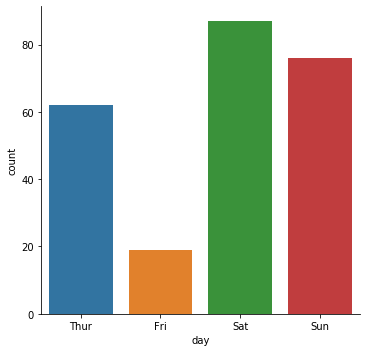

In [35]:
sns.catplot(x='day', kind='count', data=tps)

Note here that we did not have to specify the `y`-axis. It was enought to just note that we need type="count", like a histogram for categorical variables - simply counting occurences in a single categorical variable (of limited cardinality). 

There's of course a regular column chart where each height corresponds to the value from our data.

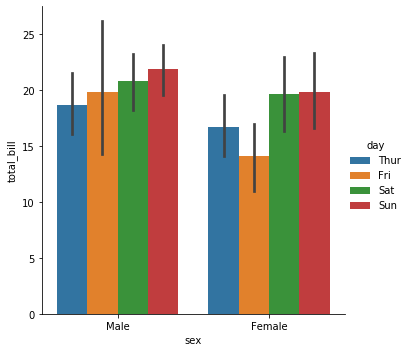

In [34]:
sns.catplot(x='sex', y='total_bill', hue='day', kind='bar', data=tps)

Point plots for categorical variables are best used for comparing values before and after. They contain both the estimate and the slope of change.

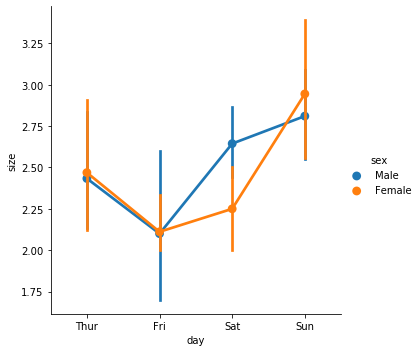

In [52]:
sns.catplot(x='day', y='size', hue='sex', kind='point', data=tps)

In [44]:
tps.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Assignment 2:
1) You don't need to yield to catplot's choice of colors. Color the points by sex (you can keep the 'type' set to the plot you liked best.

2) Plot tip vs party size. How it this plot different from the one we made with `sns.relplot`?

3) Change the "kind" of plot and repeat previous two charts. Try new "kind" called 'box'. How does one read it? How can it be useful compared to jitter,

4) Plot box plots of total_bill by day and use smoker column as a hue. What happened to the boxes?

5) There are other "kinds" of catplots including "boxen" plots and violines.

## Faceting

Faceting is about splitting your plot into the group of smaller plots that each cover one part of the data. This is the technique we used when looking at Datasaurus datasets. Our initial scatter plot could have been confusing. Lets try to split it and look at tip vs total bill by sex.

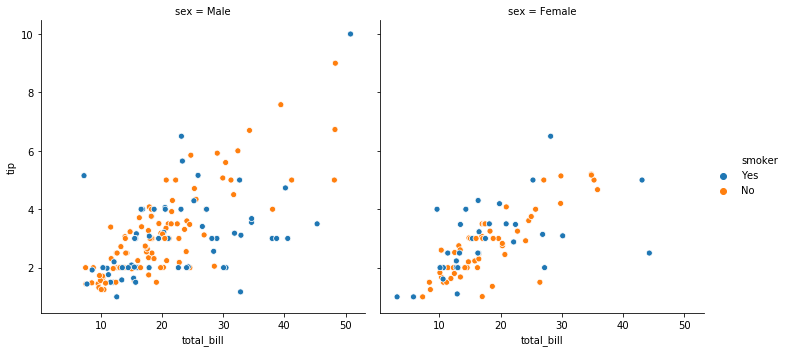

In [55]:
sns.relplot(x='total_bill', y='tip', hue='smoker',
            col='sex', data=tps)

### Assignment 3
1) You can create facets out of any categorical variable with relatively small number of levels (unique values). For example, it would also work ok , if we facet by day. Try it!

2) Make horizontal faceted boxplots of tip by sex faceted by day. If vertical faceting is controlled by column (col) argument, horizontal faceting will be coming from "row". Play with height and aspect to make a readable plot.

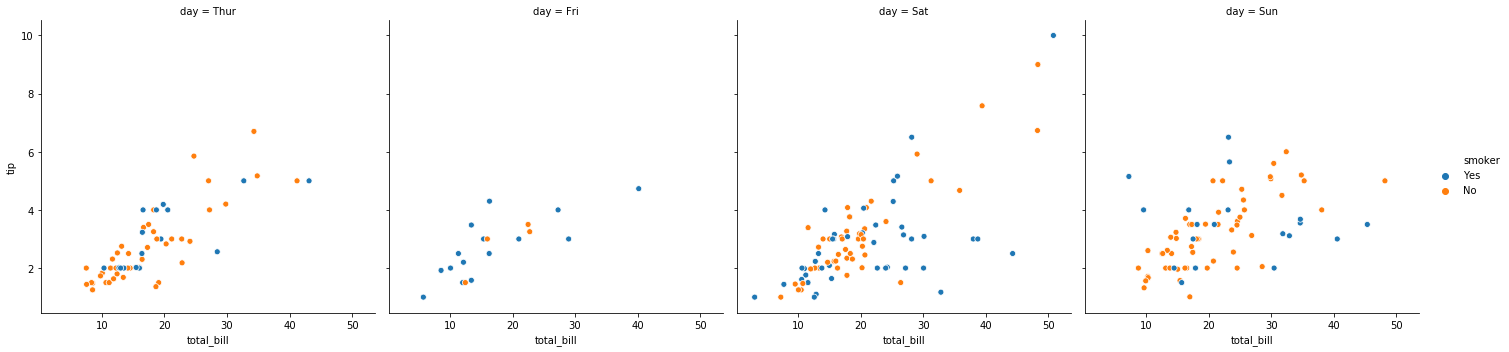

In [56]:
sns.relplot(x='total_bill', y='tip', hue='smoker',
            col='day', data=tps)

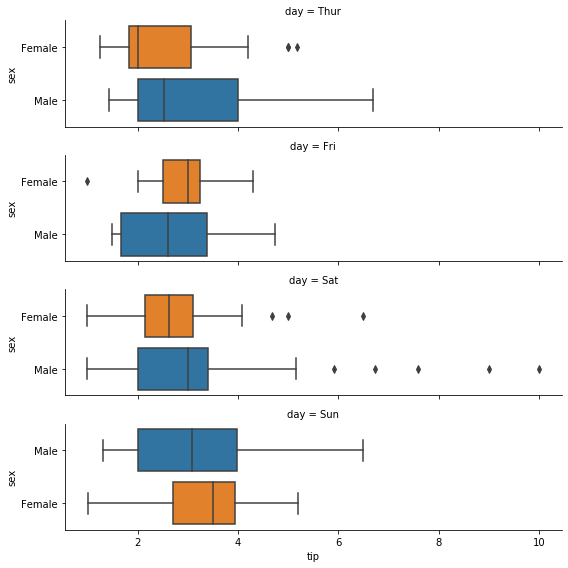

In [65]:
sns.catplot(x="tip", y="sex", row="day", kind='box', height=2, aspect=4, data=tps)

## Pairwise comparisons

We can enhance initial plot with histograms plotted for each of the marginal distributions.

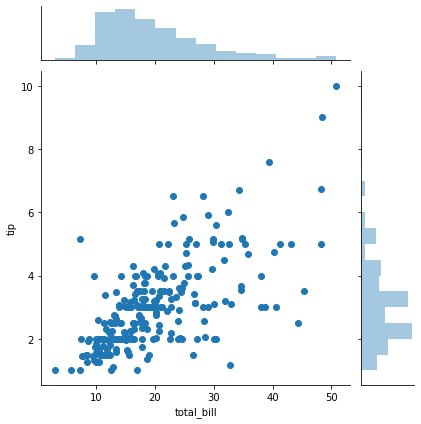

In [67]:
sns.jointplot(x='total_bill', y='tip', data=tps); sns.despine()

In some cases you may want to visually inspect correlation bewteen the continuous variables. Theres a way to quickly fit regression line and look at the relationship using linear model.

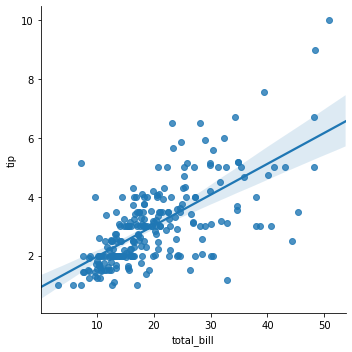

In [75]:
sns.lmplot(x='total_bill', y='tip', data=tps)

You can always use other aestetics to partition the dataset and fit multiple linear models.

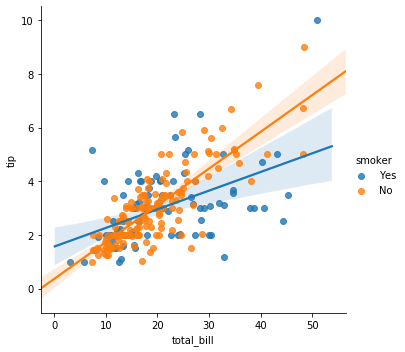

In [77]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tps)

### Assignment 4
1) Try different other kinds of jointplots: hex and kde.

With relatively small number of columns, it is possible to look at all combinations of numeric features at once. Pairplot is a good alternative then.

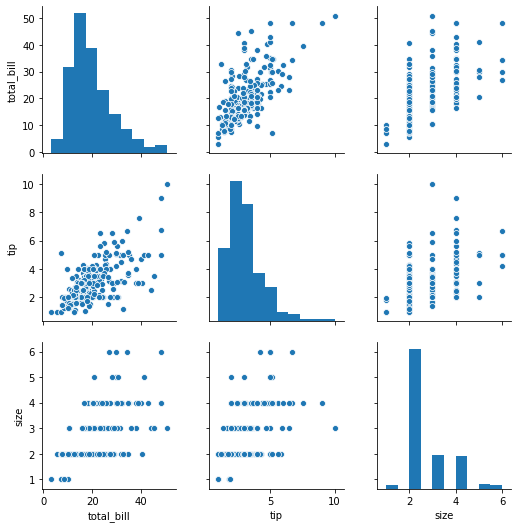

In [72]:
sns.pairplot(tps)

## Themes and palettes

Themes are pre-defined sets of aestetical decoration that get applied to the plot.There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. White set is default.

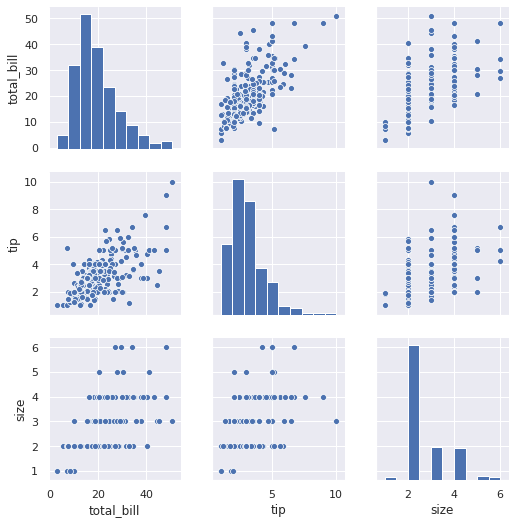

In [78]:
sns.set(style="darkgrid")
sns.pairplot(tps)

Palettes are pre-defined color sets that are automatically applied sequentially to your plot, wherever color is needed. Most palettes available in seaborn come from "colorbrewer" set. Googling "seaborn palettes" can help you choose just the one you need. Learn more about diverging, continuous and categorical color palettes and how to make your own using one of these tutorials: [this](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/), [this](https://seaborn.pydata.org/tutorial/color_palettes.html), [this](https://www.codecademy.com/articles/seaborn-design-ii) or [this](http://jose-coto.com/styling-with-seaborn).

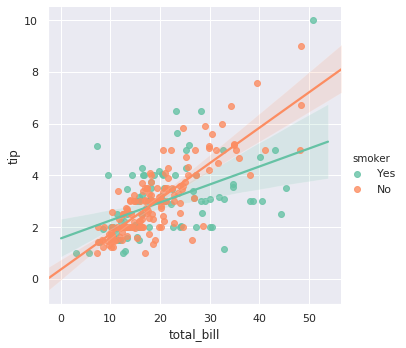

In [87]:
sns.set_palette("Set2")
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tps)

## Good luck!